In [1]:
# Imports 
import numpy as np
import os, sys
import matplotlib.pyplot as plt

In [2]:
# Some utils
LABEL_LIST = tuple(
    open(os.path.join('../cartoonx/', "imagenet_labels.txt")).read().split("\n")
)
LABEL_LIST = [
    x.replace("{", "")
    .replace("'", "")
    .replace(",", "")
    .replace("-", " ")
    .replace("_", " ")
    for x in LABEL_LIST
]

# Get predicted labels
def read_labels(path):
    with open(path, 'r') as f:
        text = f.read().split()
        label_vit = text[0]
        label_cnn = text[1]

    return label_cnn, label_vit

# Get class explanation of the given label
def get_prediction(label):
    whole_pred = LABEL_LIST[label]
    pred = whole_pred.split()[1:2]
    pred = ' '.join(pred)
    return pred

## Visualize all resuts from the model agnosticism experiment

In [8]:
# Obtain all the results
exp_results_path = '../logs/experiment2'
files = os.listdir(exp_results_path)
# We are only creating the first ten results for now
files = files[0:10]

# For every image from the dataset
for i, file in enumerate(files):
    path = os.path.join(exp_results_path, file)

    fig, axs = plt.subplots(1, 4, figsize=(15, 4), tight_layout=True)

    # Obtain the original image, the results of the CartponX for ViT and for CNN and the attention rollout
    orig_im = np.load(os.path.join(path, 'original_image.npy'))
    vit_im = np.load(os.path.join(path, 'exp_cartoonX_vit.npy'))
    cnn_im = np.load(os.path.join(path, 'exp_cartoonX_cnn.npy'))
    attention_im = np.load(os.path.join(path, 'attention_rollout.npy'))

    # Obtain the labels and explanation of the according class
    label_cnn, label_vit = read_labels(os.path.join(path, 'predictions.txt'))
    pred_cnn = get_prediction(int(label_cnn))
    pred_vit = get_prediction(int(label_vit))

    # Plot results
    axs[0].set_title('Original image')
    axs[0].imshow(orig_im)
    axs[0].axis('off')

    axs[1].set_title(r'CNN CartoonX $\lambda=20$' + f'\nPrediction: {label_cnn}\n' + pred_cnn)
    axs[1].imshow(cnn_im, cmap='copper')
    axs[1].axis('off')

    axs[2].set_title(r'ViT CartoonX $\lambda=10$' + f'\nPrediction: {label_vit}\n' + pred_vit)
    axs[2].imshow(vit_im, cmap='copper')
    axs[2].axis('off')

    axs[3].set_title('Attention rollout')
    axs[3].imshow(attention_im)
    axs[3].axis('off')

    # Save the result in a figure
    plt.show()


/scratch/ipykernel_28519/2480799637.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 4, figsize=(15, 4), tight_layout=True)


## Reproduce figure 6 from the paper

In [6]:
def visualize_examples(selected_files):
    logdir = '../logs/experiment2'
    N = len(selected_files)
    assert N > 1

    fig, axs = plt.subplots(N, 4, figsize=(20, 10), tight_layout=True)

    for i, file in enumerate(selected_files):

        path = os.path.join(logdir, file)

        # Obtain the original image, the results of the CartponX for ViT and for CNN and the attention rollout
        orig_im = np.load(os.path.join(path, 'original_image.npy'))
        vit_im = np.load(os.path.join(path, 'exp_cartoonX_vit.npy'))
        cnn_im = np.load(os.path.join(path, 'exp_cartoonX_cnn.npy'))
        attention_im = np.load(os.path.join(path, 'attention_rollout.npy'))

        # Get labels and prediction
        label_cnn, label_vit = read_labels(os.path.join(path, 'predictions.txt'))
        prediction = get_prediction(int(label_cnn))


        axs[i, 0].set_ylabel('Prediction\n' + prediction, fontsize=40)
        axs[i, 0].imshow(orig_im)
        axs[i, 0].tick_params(left=False, right=False, labelleft=False, labelbottom=False, bottom=False)

        axs[i, 1].imshow(cnn_im, cmap='copper')
        axs[i, 1].axis('off')

        axs[i, 2].imshow(vit_im, cmap='copper')
        axs[i, 2].axis('off')

        axs[i, 3].imshow(attention_im)
        axs[i, 3].axis('off')

    axs[0][1].set_title(f'CNN CartoonX', fontsize=40)
    axs[0][2].set_title(f'ViT CartoonX', fontsize=40)
    axs[0][3].set_title('Attention rollout', fontsize=40)
    plt.show()

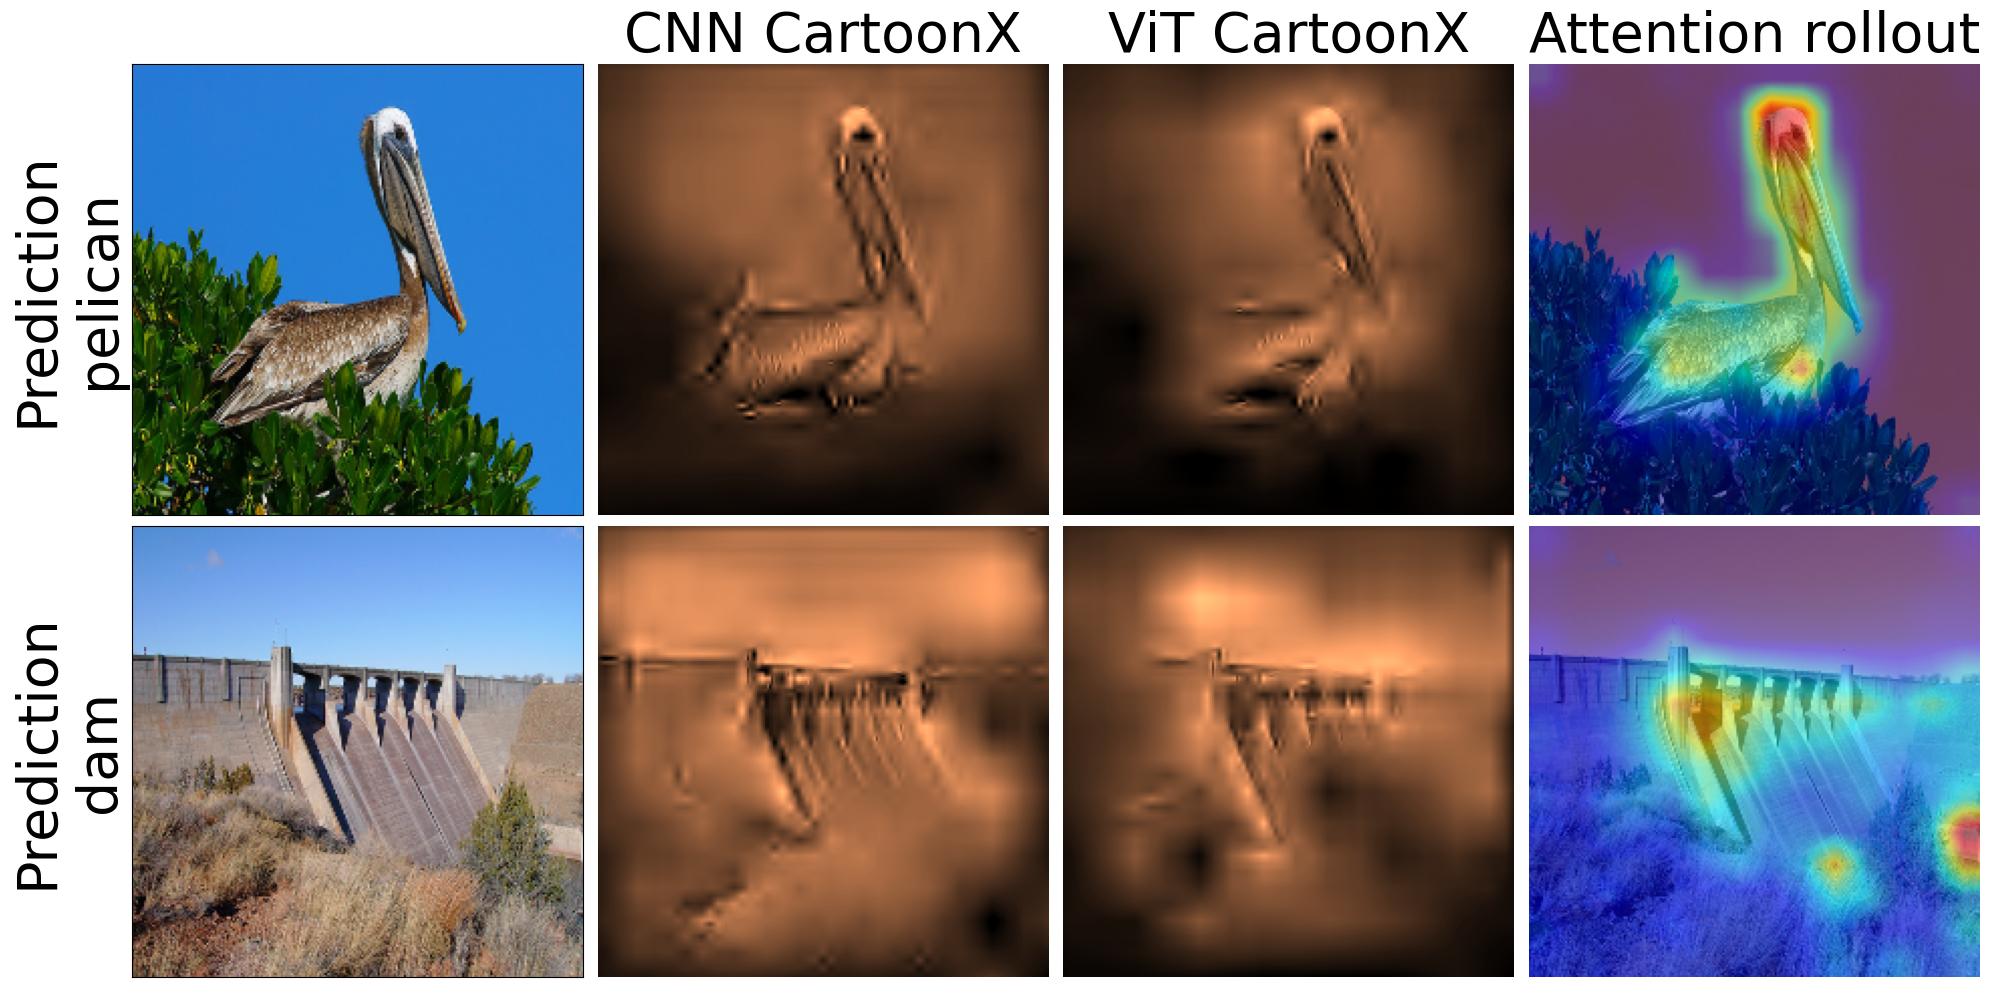

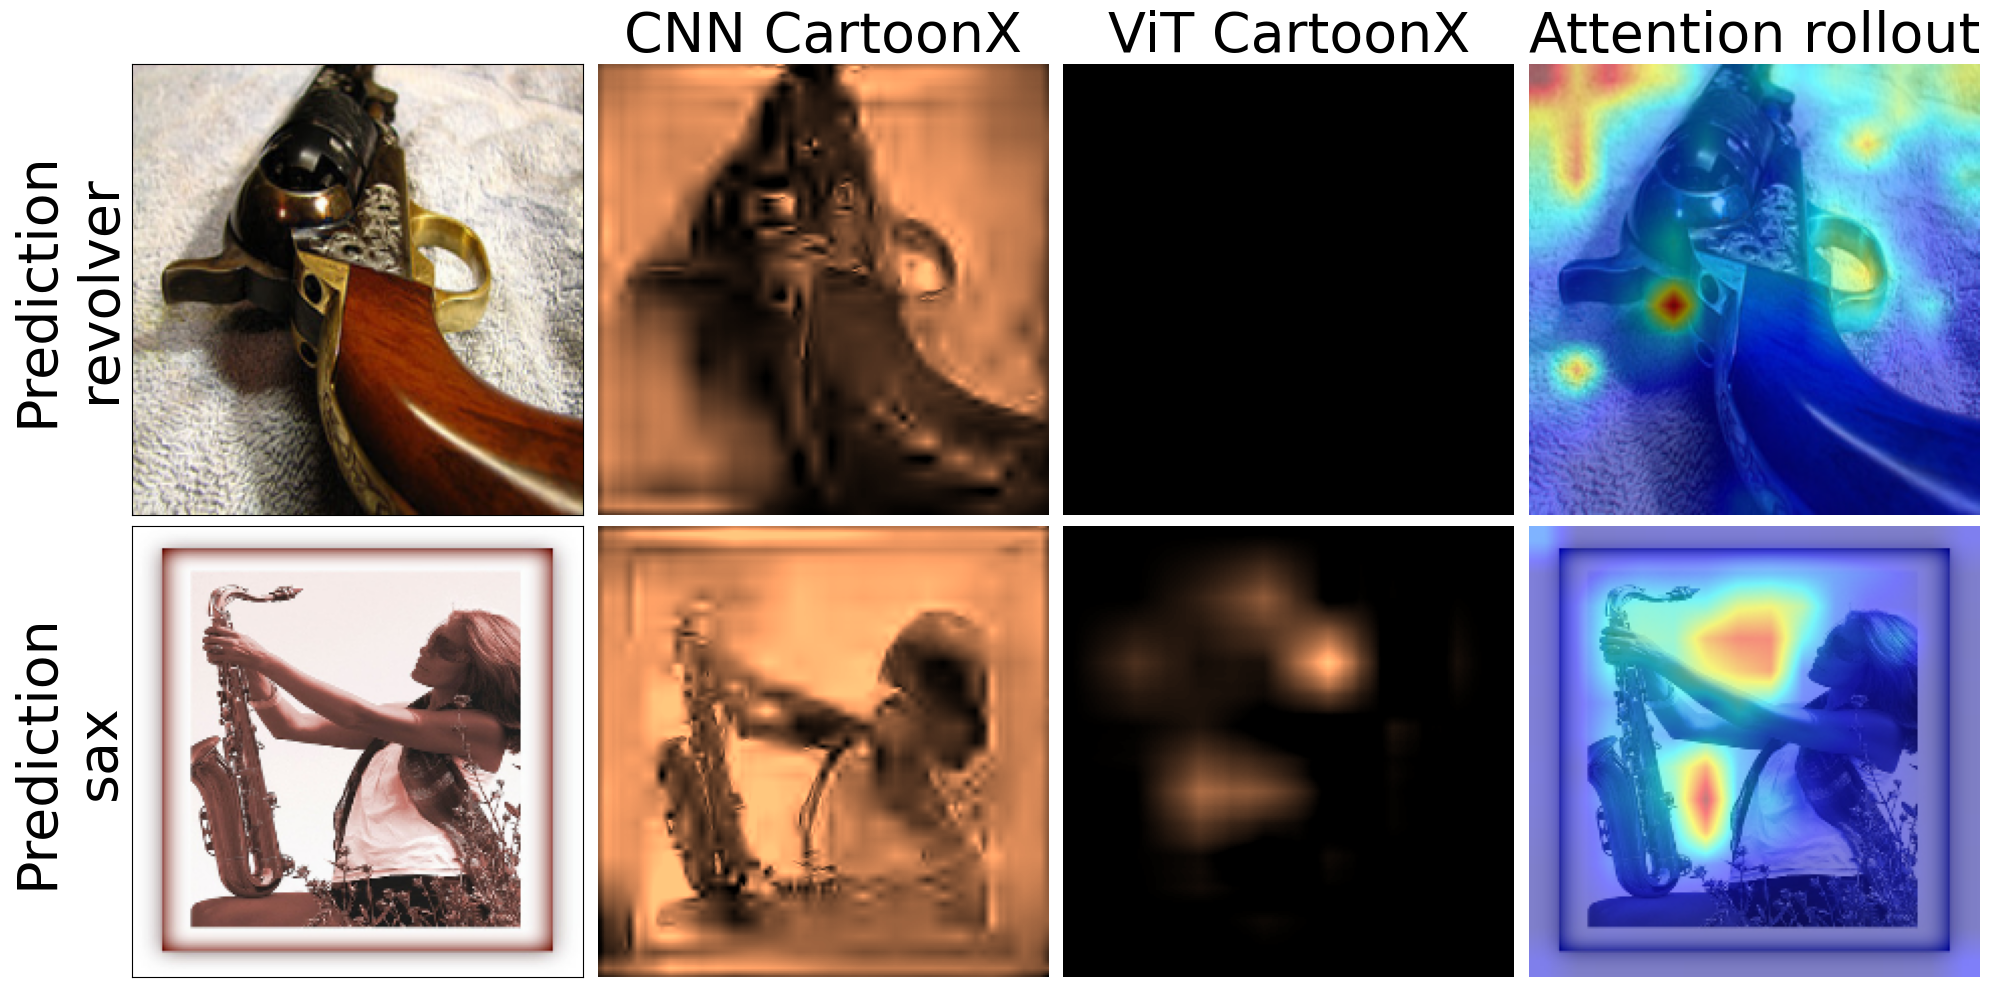

In [7]:
# Files used to reproduce Figure 6 from the paper (left and right)
selected_files_pos = [
    "n02051845_pelican", 
    "n03160309_dam", 
]
selected_files_neg = [
    "n04086273_revolver",
    "n04141076_sax"
]

visualize_examples(selected_files_pos)
visualize_examples(selected_files_neg)